# Employee Retention Story Line using Tensorflow

## 1. Install Keras and Tensorflow

In [ ]:
# upgrade pip
pip install --upgrade pip

# Current stable release for CPU-only
pip install tensorflow

# Preview nightly build for CPU-only (unstable)
pip install tf-nightly

# Install TensorFlow 2.0 RC
pip install tensorflow==2.0.0-rc0

## 1. Import the Libraries

In [3]:
import pandas as pd
import numpy as np

## 2. Import the dataset

In [23]:
df = pd.read_csv("Employee_Retention.csv")

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 3. Convert Categorical values into variables

In [26]:
feats = ['sales','salary']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)


In [31]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## 4. Separating Your Training and Testing Datasets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## 5. Transforming the Data

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6. Building the Artificial Neural Network


In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
classifier = Sequential()classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=18))


In [44]:
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=18))

In [45]:
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

In [46]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [47]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1)

Epoch 1/1
10499/10499 [==============================] - 4s 414us/step - loss: 0.4054 - acc: 0.8120


## 7. Running Predictions on the Test Set

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
y_pred = (y_pred > 0.5)

## 8. Checking the Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[3216,  213],
       [ 350,  721]], dtype=int64)

## Find Accuracy

In [54]:
Accuracy = (3216+721)/4500

In [55]:
Accuracy

0.8748888888888889

## It means at least 87% correct predictions it achieve from this model

## 9. Making a Single Prediction

In [60]:
new_pred = classifier.predict(sc.transform(np.array([[0.26,0.7 ,3., 238., 6., 0.,0.,0.,0., 0.,0.,0.,0.,0.,1.,0., 0.,1.]])))

In [61]:
new_pred = (new_pred > 0.5)
new_pred

array([[False]])

## False output means employee is not leaving the organization

In [65]:
new_pred = (new_pred > 0.6)
new_pred

array([[False]])

## Same result after increasing the prediction probability

## Graphical Correlation between variable

In [68]:
import seaborn as sns

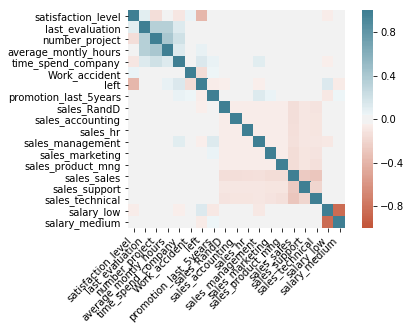

In [69]:

corr = df_final.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);